# Atividade: Neurônio Artificial

**INSTITUTO FEDERAL DE MINAS GERAIS BAMBUI**

**Pofessor:** Ciniro Nametala

**Aluno:** Ricardo Antonio

Diretório atual: c:\Users\ricar\OneDrive\Área de Trabalho\Redes Neurais\Redes-Neurais


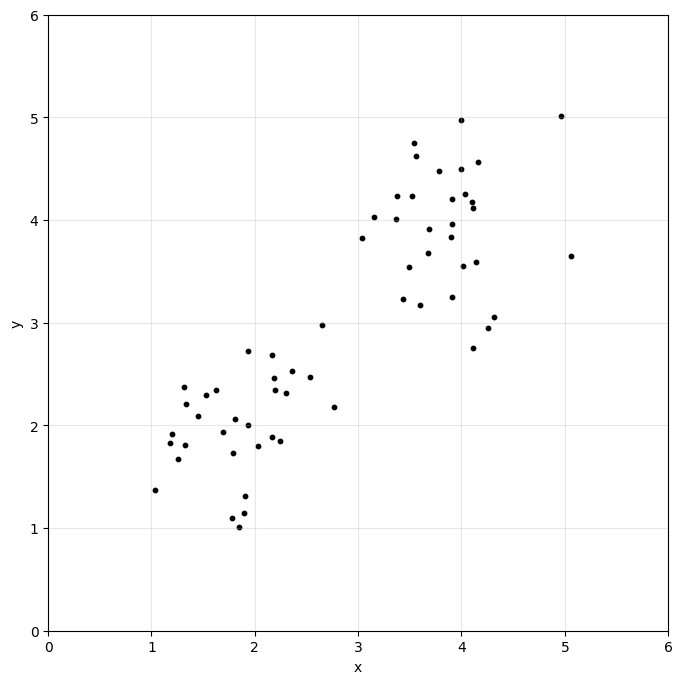

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import os

cwd = os.getcwd()
print(f"Diretório atual: {cwd}")
caminho_csv = os.path.join(cwd, "xy.csv")

def plot_csv_xy(caminho_csv):
    """
    Lê um CSV com duas colunas (x,y) e plota um gráfico de linha.
    Tenta detectar automaticamente o separador e cabeçalho.
    """
    try:
        # Detecta automaticamente o separador
        df = pd.read_csv(caminho_csv, sep=None, engine="python")
    except Exception as e:
        raise ValueError(f"Erro ao ler o CSV: {e}")

    # Remove espaços extras do nome das colunas
    df.columns = df.columns.str.strip().str.lower()
    
    # Se não encontrar 'x' e 'y', tenta assumir as duas primeiras colunas
    if not {'x', 'y'}.issubset(df.columns):
        print("⚠️ Colunas 'x' e 'y' não encontradas. Usando as duas primeiras colunas do arquivo.")
        df = df.iloc[:, :2]
        df.columns = ['x', 'y']

    # Plota o gráfico
    plt.figure(figsize=(8,8))
    plt.scatter(df['x'], df['y'], c='black', s=10)
    plt.xlim(0,6)
    plt.ylim(0,6)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True, alpha=0.3)
    plt.show()

# Exemplo de uso
plot_csv_xy(caminho_csv)


In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [223]:
#função neuronio
def neuronio(x,y,w0,w1,w2,bias):
   somatorio_neuronios = x*w1 + y*w2
   bia = bias*w0
   return 1 if somatorio_neuronios - bia > 0 else 0

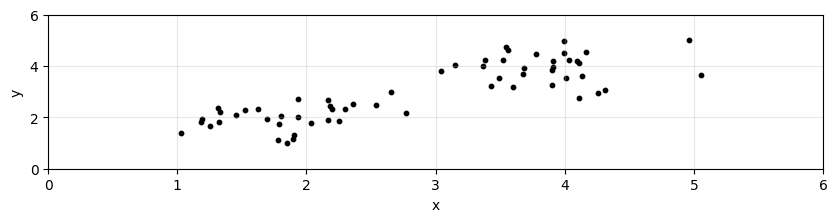

In [224]:
dados = pd.read_csv('xy.csv', sep=';', decimal=',')

dados['x'] = pd.to_numeric(dados['x'], errors='coerce')
dados['y'] = pd.to_numeric(dados['y'], errors='coerce')

dados.head()

plt.figure(figsize=(10,2))
plt.scatter(dados['x'], dados['y'], c='black', s=10)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
import random
w0 = random.random()
print(w0)
w1 = random.random()
print(w1)
w2 = -1
bias = 1

classificacoes = []
for i, linha in dados.iterrows():
   classe = neuronio(linha['x'], linha['y'], w0, w1, w2, bias)
   classificacoes.append(classe)
   
dados['classe'] = classificacoes
dados.head()

0.428096594434932
0.7482493032314788


,x,y,classe
0,1.183988,1.832880,0
1,1.523565,2.293337,0
2,2.199241,2.342880,0
3,2.768052,2.179136,0
4,2.165374,1.888445,0


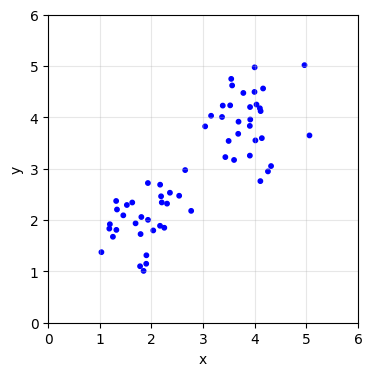

In [226]:
plt.figure(figsize=(4,4))
cores = ['blue' if c == 0 else 'green' for c in dados['classe']]
plt.scatter(dados['x'], dados['y'], c = cores, s=10)

eixox = np.linspace(0, 6, 100)
eixoy = (w0 * -1) - eixox
plt.plot(eixox, eixoy, 'r-', linewidth=1)

plt.xlim(0,6)
plt.ylim(0,6)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, alpha=0.3)
plt.show()